<a href="https://colab.research.google.com/github/adityayadav4507/100Days_of_ML/blob/main/47_Day_B_PCA_step_by_step.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [94]:
import numpy as np
import pandas as pd


In [95]:
# creating dataset

np.random.seed(42)

mu_vec1=np.array([0,0,0])
cov_mat1=np.array([[1,0,0],[0,1,0],[0,0,1]])
x1_samples=np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df=pd.DataFrame(x1_samples,columns=['x1','x2','x3'])
df['target']=1


mu_vec2=np.array([1,1,1])
cov_mat2=np.array([[1,0,0],[0,1,0],[0,0,1]])
x2_samples=np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1=pd.DataFrame(x2_samples,columns=['x1','x2','x3'])
df1['target']=0

df= pd.concat([df,df1],ignore_index=True)
df.sample(5)

,x1,x2,x3,target
32,1.296120,1.261055,1.005113,0
36,1.257550,0.925554,-0.918771,0
35,1.404051,2.886186,1.174578,0
22,0.927990,2.003533,1.361636,0
11,-1.057711,0.822545,-1.220844,1


In [96]:
df.shape

(40, 4)

In [97]:
# 3D visualizationn

import plotly.express as px

fig=px.scatter_3d(df,x=df['x1'],y=df['x2'],z=df['x3'],color=df['target'].astype(str))

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers')
                  )
fig.show()

# step1 -> mean centring

In [98]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

df.iloc[:,0:3]=scaler.fit_transform(df.iloc[:,0:3])

df.sample(5)

,x1,x2,x3,target
22,0.634222,1.250404,0.849227,0
14,-0.767751,-0.626414,-1.508220,1
20,0.087258,0.281966,-0.369249,0
34,0.270571,-0.220187,0.415180,0
6,-1.832189,-1.531338,0.935561,1


# step 2 -> Find covarience

In [99]:
covarienc_matrix=np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])

covarienc_matrix

array([[1.02564103, 0.35175   , 0.07987862],
       [0.35175   , 1.02564103, 0.28328008],
       [0.07987862, 0.28328008, 1.02564103]])

# step 3 -> Finding Eigen value and Eigen vector

In [100]:
eigen_values , eigen_vector=np.linalg.eig(covarienc_matrix)

In [101]:
eigen_values

array([1.51825759, 0.94771609, 0.6109494 ])

In [102]:
eigen_vector

array([[-0.56014874, -0.62132881,  0.5478904 ],
       [-0.67561935, -0.04005698, -0.73616162],
       [-0.47934526,  0.78252536,  0.3973439 ]])

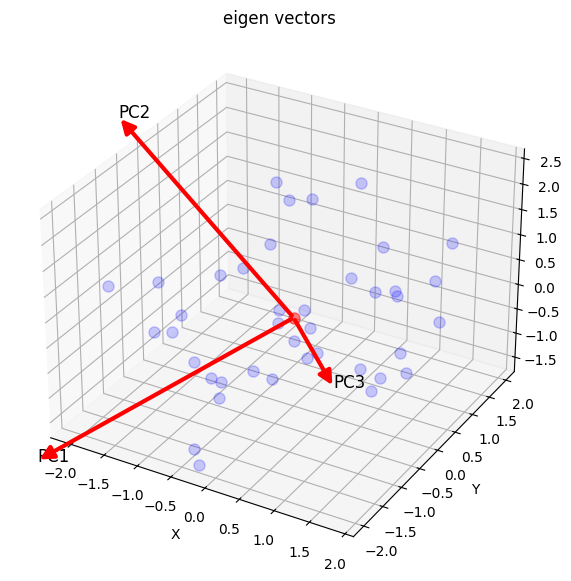

In [119]:
from collections.abc import MutableMapping
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

class Arrow3D(FancyArrowPatch):
   def __init__(self,xs,ys,zs,*args,**kwargs):
     FancyArrowPatch.__init__(self,(0,0),(0,0),*args,**kwargs)
     self._verts3d =xs,ys,zs



   def draw(self,renderer):
    xs3d,ys3d,zs3d = self._verts3d
    xs , ys , zs = proj3d.proj_transform(xs3d,ys3d,zs3d,self.axes.M)
    self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
    FancyArrowPatch.draw(self,renderer)


   def do_3d_projection(self):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        return np.min(zs)  # used for depth ordering


fig=plt.figure(figsize=(7,7))

ax = fig.add_subplot(111,projection='3d')

ax.plot(df['x1'],df['x2'],df['x3'],'o',markersize=8, color='blue', alpha=0.2)


ax.plot([df['x1'].mean()],[df['x2'].mean()],[df['x3'].mean()],'o',markersize=8, color='red', alpha=0.5)


labels = ['PC1', 'PC2', 'PC3'] # label for eigen vector
for v,label in zip(eigen_vector.T,labels):

    mean_df=[df['x1'].mean(),df['x2'].mean(),df['x3'].mean()]
    end=[4*v[0],4*v[1],4*v[2]]
    arrow = Arrow3D([mean_df[0] , end[0]], # 4 multipy bec to scale v is unit vector it diffcult to show in graph
                [mean_df[1] , end[1]],
                [mean_df[2] , end[2]],
                mutation_scale=20 ,
                lw=3 ,
                arrowstyle="-|>",
                color="r")
    ax.add_artist(arrow)

    ax.text(end[0], end[1], end[2],label, color='black', fontsize=12)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('eigen vectors')

plt.show()


In [104]:
pc=eigen_vector[0:2]

In [105]:
transformed_df=np.dot(df.iloc[:,0:3],pc.T) # this is array of 40,2

In [106]:
new_df=pd.DataFrame(transformed_df,columns=['pc1','pc2'])
new_df['target']=df['target'].values
new_df.head()

,pc1,pc2,target
0,0.416681,-0.206204,1
1,-0.708108,-0.595720,1
2,-1.364202,-0.535582,1
3,0.040356,0.443141,1
4,0.427521,1.532677,1


In [107]:
# plot it

new_df['target']=new_df['target'].astype(str)

fig=px.scatter(new_df,x='pc1',y='pc2',color='target')

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='darkslategrey')),
                  selector=dict(mode='markers')
                  )
fig.show()